In [27]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [28]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [29]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [30]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [31]:
gold_data.shape

(2290, 6)

In [32]:
gold_data.info

<bound method DataFrame.info of            Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]>

In [33]:
gold_data.isnull()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2285,False,False,False,False,False,False
2286,False,False,False,False,False,False
2287,False,False,False,False,False,False
2288,False,False,False,False,False,False


In [34]:
gold_data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        Date    SPX    GLD    USO    SLV  EUR/USD
0     False  False  False  False  False    False
1     False  False  False  False  False    False
2     False  False  False  False  False    False
3     False  False  False  False  False    False
4     False  False  False  False  False    False
...     ...    ...    ...    ...    ...      ...
2285  False  False  False  False  False    False
2286  False  False  False  False  False    False
2287  False  False  False  False  False    False
2288  False  False  False  False  False    False
2289  False  False  False  False  False    False

[2290 rows x 6 columns]>

In [35]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [36]:
correlation = gold_data.corr()

In [37]:
plt.figure(figsize=(8,8))

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

In [38]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-39-4569879e3289>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

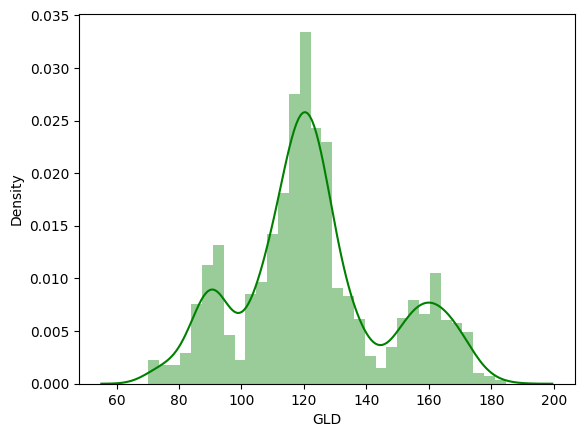

In [39]:
sns.distplot(gold_data['GLD'],color='green')

In [40]:
X = gold_data.drop(['Date','GLD'],axis=1)

In [41]:
Y = gold_data['GLD']

In [42]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [43]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [44]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [46]:
regressor = RandomForestRegressor(n_estimators = 100)

In [47]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [48]:
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.60839969  81.83289995 115.89940009 127.60650057 120.92200138
 154.73909819 150.13829875 126.06780052 117.53049867 126.04910048
 116.66530083 172.23120084 141.77999882 167.89829848 115.23810018
 117.67870021 138.75890338 170.1690009  159.78470215 158.87819938
 155.17260052 125.18279979 176.26139963 157.43130404 125.25170042
  93.79429994  78.16709983 120.39359995 119.11239943 167.53999918
  88.26830102 125.23260008  91.11330053 117.77410016 121.21709926
 135.72040076 115.36770148 114.82050068 148.59639921 106.99740112
 104.54890297  86.98009776 126.38550013 117.85529992 152.89989855
 119.58419972 108.28669968 108.14569805  93.2769005  127.06509783
  75.43360023 113.6152994  121.41950012 111.34429916 118.87719897
 120.58579923 160.07339898 169.30760147 147.16629652  85.64139843
  94.25040039  86.8146986   90.53570022 118.92710104 126.43040041
 127.6082001  170.62639967 122.28569891 117.40219891  98.31370019
 167.94230133 143.20049777 131.9780031  121.19860228 121.36819959
 119.80410

In [49]:
error_score = metrics.r2_score(Y_test , test_data_prediction)
print("R_squared-error:",error_score)

R_squared-error: 0.9889701056379013


In [50]:
Y_test = list(Y_test)

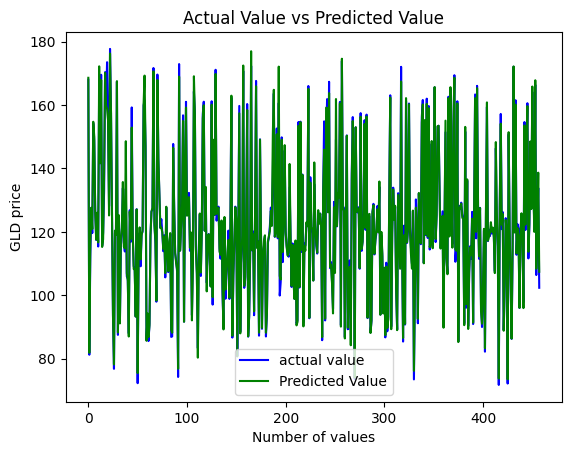

In [51]:
plt.plot(Y_test,color="blue",label="actual value")
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Value vs Predicted Value')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()

In [59]:
input_data =(1290.189,66.059888,12.590,1.557099)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


In [60]:
prediction = regressor.predict(input_data_reshaped)[0]

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [61]:
prediction

86.36769924000002